# Lista 8
## Jakub Ciągło (275986), Mateusz Ćwiek (276011)
___
## Importy

In [24]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

___
## Zadanie 1

In [25]:
dataset = load_dataset("imdb")


df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])
df = pd.concat([df_train, df_test], ignore_index=True)

df = df.sample(5000, random_state=42).reset_index(drop=True)

print(f"Liczba recenzji (w użyciu): {len(df)}")
print(f"Rozkład klas (0: Negatywna, 1: Pozytywna):\n{df['label'].value_counts()}")

df['length'] = df['text'].apply(len)
print(f"Średnia długość tekstu: {df['length'].mean():.2f} znaków\n")

print("Przykładowa recenzja:")
print(df[['text', 'label']].head(1))

Liczba recenzji (w użyciu): 5000
Rozkład klas (0: Negatywna, 1: Pozytywna):
label
1    2504
0    2496
Name: count, dtype: int64
Średnia długość tekstu: 1319.58 znaków

Przykładowa recenzja:
                                                text  label
0  Forget what I said about Emeril. Rachael Ray i...      0


___
## Zadanie 2

In [26]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    stopwords = set(['the', 'and', 'is', 'in', 'it', 'to', 'of', 'a', 'an', 'was', 'i', 'my', 'for', 'but', 'on', 'at', 'with'])
    words = text.split()
    words = [w for w in words if w not in stopwords]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)

print(f"Przed: {df['text'][0]}")
print(f"Po:    {df['clean_text'][0]}\n")

Przed: Forget what I said about Emeril. Rachael Ray is the most irritating personality on the Food Network AND all of television. If you've never seen 30 Minute Meals, then you cannot possibly begin to comprehend how unfathomably annoying she is. I really truly meant that you can't even begin to be boggled by her until you've viewed the show once or twice, and even then all words and intelligent thoughts will fail you. The problem is mostly with her mannerisms as you might have guessed. Ray has a goofy mouth and often imitates the parrot. If you love something or think it's "awesome" (a word she uses roughly 87 times per telecast) just say it. And she's constantly using horrible, unfunny catchphrases like "EVOO" (Extra virgin olive oil!). SHUT UP! What's worse is Ray has TWO other shows on the network! I think this is some elaborate conspiracy by the terrorists to drive us mad. Give me more Tyler Florence! Ray is lame.
Po:    forget what said about emeril rachael ray most irritating pe

___
## Zadanie 3

In [27]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

print(f"Kształt macierzy cech: {X.shape} (Recenzje x Słowa)\n")

Kształt macierzy cech: (5000, 50550) (Recenzje x Słowa)



___
## Zadanie 4

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

___
## Zadanie 5

Dokładność (Accuracy): 0.83

Raport klasyfikacji (Precision, Recall, F1):
              precision    recall  f1-score   support

    Negative       0.80      0.89      0.85       760
    Positive       0.87      0.78      0.82       740

    accuracy                           0.83      1500
   macro avg       0.84      0.83      0.83      1500
weighted avg       0.84      0.83      0.83      1500



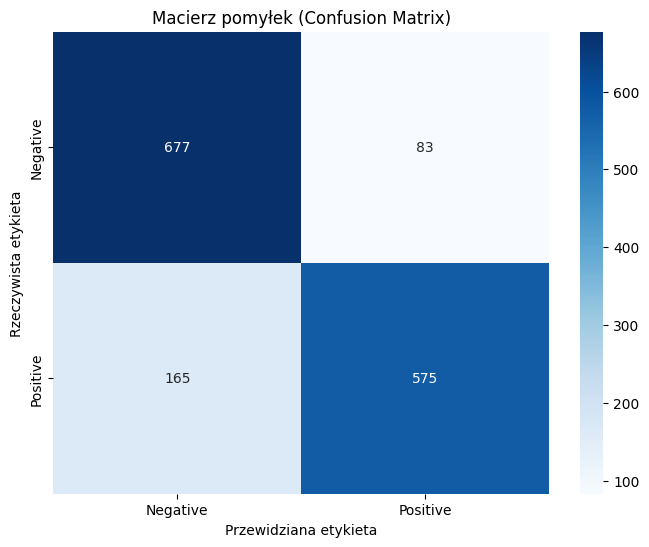

In [29]:
y_pred = model.predict(X_test)

print(f"Dokładność (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print("\nRaport klasyfikacji (Precision, Recall, F1):")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Obliczenie macierzy pomyłek
cm = confusion_matrix(y_test, y_pred)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Przewidziana etykieta')
plt.ylabel('Rzeczywista etykieta')
plt.title('Macierz pomyłek (Confusion Matrix)')
plt.show()

___
## Zadanie 6

In [30]:
new_reviews = [
    "This film is absolutely brilliant! Best movie of the year.", # Pozytywna
    "Boring, slow, and terrible acting. Don't watch it.",       # Negatywna
    "It was okay, not great but not terrible either."           # Neutralna
]

new_reviews_clean = [clean_text(r) for r in new_reviews]
new_X = vectorizer.transform(new_reviews_clean)

predictions = model.predict(new_X)
probs = model.predict_proba(new_X)

classes = ['Negative', 'Positive']

for review, pred, prob in zip(new_reviews, predictions, probs):
    sentiment = classes[pred]
    confidence = max(prob)
    print(f"Recenzja: '{review}'")
    print(f" -> Wydźwięk: {sentiment} (Pewność: {confidence:.2f})\n")

Recenzja: 'This film is absolutely brilliant! Best movie of the year.'
 -> Wydźwięk: Positive (Pewność: 0.71)

Recenzja: 'Boring, slow, and terrible acting. Don't watch it.'
 -> Wydźwięk: Negative (Pewność: 0.86)

Recenzja: 'It was okay, not great but not terrible either.'
 -> Wydźwięk: Negative (Pewność: 0.74)

